In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from prettytable import PrettyTable
import re

In [2]:
#loadig data
df=pd.read_csv(r'D:\applied\assignment\8DONAR\train_data.csv')

In [3]:
df.shape

(109248, 17)

In [4]:
df.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1


 % of project got rejected is  15.14 %
 % of project not rejected is  84.86 %

 0 ="rejected", 1 ="accepted" 


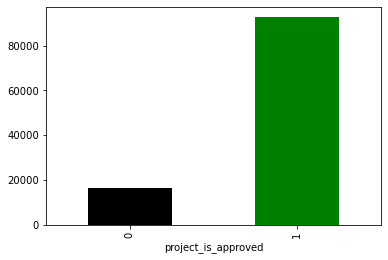

In [23]:
arry=np.array(df.groupby(['project_is_approved'])['project_is_approved'].count())
df.groupby(['project_is_approved'])['project_is_approved'].count().plot(kind='bar',color=['black','green'])
print(' % of project got rejected is ', round((arry[0]*100)/sum(arry),2),'%')
print(' % of project not rejected is ', round((arry[1]*100)/sum(arry),2),'%')
print( )
print(' 0 ="rejected", 1 ="accepted" ')

- __data is imbalanced__

# Univariate analysis of  teacher_number_of_previously_posted_projects

Text(0.5, 1.0, 'Box plot')

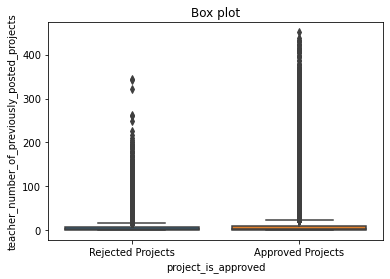

In [21]:
# number of previous posted project in case of project accepted or rejected 
sns.boxplot(x=df['project_is_approved'],y=df['teacher_number_of_previously_posted_projects'])
plt.xticks([0,1],('Rejected Projects','Approved Projects'))
plt.title('Box plot')

- Nothing can be obtain from above boxplot

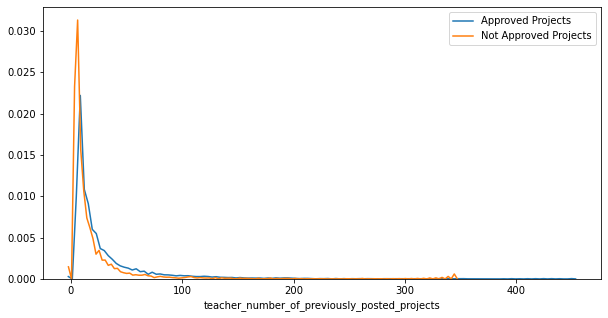

In [22]:
#plotting pdf 
plt.figure(figsize=(10,5))
sns.distplot(df[df['project_is_approved']==1]['teacher_number_of_previously_posted_projects'],hist=False,label="Approved Projects")
sns.distplot(df[df['project_is_approved']==0]['teacher_number_of_previously_posted_projects'],hist=False,label="Not Approved Projects")
plt.legend()

### Conclusion-
- line are not completely overlaping so we can say number of previously posted projects are differet for project approved or not. 
- we can use this feature in our model

In [23]:

# percentile of teacher_number_of_previously_posted_projects
approved_project=df[df['project_is_approved']==1]['teacher_number_of_previously_posted_projects']
rejected_project=df[df['project_is_approved']==0]['teacher_number_of_previously_posted_projects']

x = PrettyTable()
x.field_names = ["Percentile", "Approved Projects", "Not Approved Projects"]

for i in range(0,101,5):
    x.add_row([i,np.round(np.percentile(approved_project,i), 3), np.round(np.percentile(rejected_project,i), 3)])
print(x)

+------------+-------------------+-----------------------+
| Percentile | Approved Projects | Not Approved Projects |
+------------+-------------------+-----------------------+
|     0      |        0.0        |          0.0          |
|     5      |        0.0        |          0.0          |
|     10     |        0.0        |          0.0          |
|     15     |        0.0        |          0.0          |
|     20     |        0.0        |          0.0          |
|     25     |        0.0        |          0.0          |
|     30     |        1.0        |          0.0          |
|     35     |        1.0        |          1.0          |
|     40     |        1.0        |          1.0          |
|     45     |        2.0        |          1.0          |
|     50     |        2.0        |          2.0          |
|     55     |        3.0        |          2.0          |
|     60     |        4.0        |          3.0          |
|     65     |        5.0        |          3.0         

### Observation-
- Teacher number of previously posted projects is always greater in case of approved project


# Univariate analysis of project_resource_summary

In [24]:
df['project_resource_summary'][10]
df['project_resource_summary'][110]

"My students need pencils and pencils sharpeners because we use them everyday and it's the first thing that runs out. Laminating helps with durability and overall appeal of classroom material. Pocket charts help with organization."

In [25]:
#length of project resource summary 
accepted_proj_sum=df[df['project_is_approved']==1]['project_resource_summary'].str.split().apply(len)
rejected_proj_sum=df[df['project_is_approved']==0]['project_resource_summary'].str.split().apply(len)

Text(0.5, 1.0, 'PDF of number of words in Project resource summary')

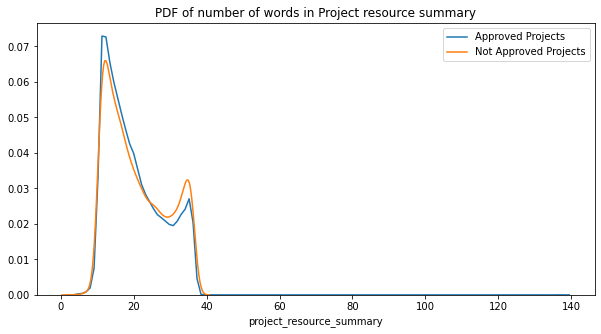

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(accepted_proj_sum,label="Approved Projects",hist=False)
sns.distplot(rejected_proj_sum,label="Not Approved Projects",hist=False)
plt.legend()
plt.title('PDF of number of words in Project resource summary')

### Observation
- As we can se the line of approved project is ahead not approved project 
- Thus the length of word in project_resource_summary in approved project is greater than not approved project

In [27]:
# checking for presence of number in project_resource_summary if number is present then give 1 value and if not then 0 
lis = df['project_resource_summary']
number_present=[]

for i in lis:
    if bool(re.search(r'\d',i))==True:
        number_present.append(1)
    else:
        number_present.append(0)
print('Total number of project_resource_summary have number present = ',sum(number_present))

Total number of project_resource_summary have number present =  15756


In [28]:
havenumber_df=pd.DataFrame({'accepted':df['project_is_approved'].values,'number_present':number_present})
havenumber_df.groupby('accepted').sum().reset_index()

,accepted,number_present
0,0,1666
1,1,14090


we have 14090 projects which are accepted and number present in project resource summary 
and only 1666 project which have number present in project resource summary are not accepted 
    

# Making data ready for model 

In [29]:
#loading resource data
resource_df=pd.read_csv(r'D:\applied\assignment\8DONAR\resources.csv')
resource_df.shape

(1541272, 4)

In [32]:
print('number of projects in resource data',len(resource_df['id'].unique()))
print('number of projects in train data',len(df['id'].unique()))

number of projects in resource data 260115
number of projects in train data 109248


In [33]:
#grouping resource data on basis of id 
grouped_res_df=resource_df.groupby('id').sum().reset_index()

In [34]:
#joing two data frame, left join, joining only on those id's that we have in train data
df=df.join(grouped_res_df.set_index('id'),on='id',how='left')

In [35]:
print(df.columns)
print(df.shape)
df.head(3)

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity', 'price'],
      dtype='object')
(109248, 19)


,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,quantity,price
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,23,154.60
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,1,299.00
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0,22,516.85


# Cleaning/Processing the data 

## 1. Text data

## 1.1 Preprocessing/cleaning project_title	

In [36]:
#checking for null values 
df['project_title'].isnull().sum()

0

In [37]:
print(df['project_title'][880])
print(df['project_title'][90])
print(df['project_title'][87])
print(df['project_title'][40])

I CAN do it!
Publishers Need a Printer!
Exploring Graphic Novels
Leveling Books in a Multi-Age Class


In [38]:

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [39]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [40]:
# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent) #remove all special characters, punctuation and spaces from a string
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)#removing stop words 
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [41]:
preprocessed_titles = preprocess_text(df['project_title'].values)

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:05<00:00, 19256.66it/s]


In [42]:
#checking for null values again
n=0 # to count the number of null values 
for i in preprocessed_titles:
    if not i:
        n=n+1
print(n)  

# we are getting Null values because of preprocessing like if title is : WE CAN DO IT 
# this will result in null value after preprocessing 

43


## 1.2 Preprocessing/cleaning Essay 
combining all the 4 column of essay project_essay_1,project_essay_2,project_essay_3,project_essay_4

In [43]:
# merge two column text dataframe: 
df["essay"] = df["project_essay_1"].map(str) +\
                        df["project_essay_2"].map(str) + \
                        df["project_essay_3"].map(str) + \
                        df["project_essay_4"].map(str)

In [44]:

preprocessed_essays = preprocess_text(df['essay'].values)

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:14<00:00, 814.71it/s]


## 1.3 Preprocessing/cleaning project_resource_summary

In [45]:
preprocessed_resource_summary = preprocess_text(df['project_resource_summary'].values)

100%|████████████████████████████████████████████████████████████████████████| 109248/109248 [00:13<00:00, 8340.05it/s]


## 1.4  Preprocessing/cleaning  project_grade_category

In [46]:
df['project_grade_category'].value_counts()

Grades PreK-2    44225
Grades 3-5       37137
Grades 6-8       16923
Grades 9-12      10963
Name: project_grade_category, dtype: int64

In [47]:

df['project_grade_category'] = df['project_grade_category'].str.replace(' ','_')
df['project_grade_category'] = df['project_grade_category'].str.replace('-','_')
df['project_grade_category'] = df['project_grade_category'].str.lower()
df['project_grade_category'].value_counts()

grades_prek_2    44225
grades_3_5       37137
grades_6_8       16923
grades_9_12      10963
Name: project_grade_category, dtype: int64

## 1.5 Preprocessing/cleaning  project_subject_categories

In [48]:
df['project_subject_categories'].value_counts()

Literacy & Language                           23655
Math & Science                                17072
Literacy & Language, Math & Science           14636
Health & Sports                               10177
Music & The Arts                               5180
Special Needs                                  4226
Literacy & Language, Special Needs             3961
Applied Learning                               3771
Math & Science, Literacy & Language            2289
Applied Learning, Literacy & Language          2191
History & Civics                               1851
Math & Science, Special Needs                  1840
Literacy & Language, Music & The Arts          1757
Math & Science, Music & The Arts               1642
Applied Learning, Special Needs                1467
History & Civics, Literacy & Language          1421
Health & Sports, Special Needs                 1391
Warmth, Care & Hunger                          1309
Math & Science, Applied Learning               1220
Applied Lear

In [49]:
#Preprocessing project_subject_categories
df['project_subject_categories'] = df['project_subject_categories'].str.replace(' The ','')
df['project_subject_categories'] = df['project_subject_categories'].str.replace(' ','')
df['project_subject_categories'] = df['project_subject_categories'].str.replace('&','_')
df['project_subject_categories'] = df['project_subject_categories'].str.replace(',','_')
df['project_subject_categories'] = df['project_subject_categories'].str.lower()
df['project_subject_categories'].value_counts()

literacy_language                       23655
math_science                            17072
literacy_language_math_science          14636
health_sports                           10177
music_arts                               5180
specialneeds                             4226
literacy_language_specialneeds           3961
appliedlearning                          3771
math_science_literacy_language           2289
appliedlearning_literacy_language        2191
history_civics                           1851
math_science_specialneeds                1840
literacy_language_music_arts             1757
math_science_music_arts                  1642
appliedlearning_specialneeds             1467
history_civics_literacy_language         1421
health_sports_specialneeds               1391
warmth_care_hunger                       1309
math_science_appliedlearning             1220
appliedlearning_math_science             1052
literacy_language_history_civics          809
health_sports_literacy_language   

## 1.6 Preprocessing/cleaning project_subject_subcategories

In [50]:
#Preprocessing project_subject_subcategories

df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(' The ','')
df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(' ','')
df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace('&','_')
df['project_subject_subcategories'] = df['project_subject_subcategories'].str.replace(',','_')
df['project_subject_subcategories'] = df['project_subject_subcategories'].str.lower()
df['project_subject_subcategories'].value_counts()

literacy                                 9486
literacy_mathematics                     8325
literature_writing_mathematics           5923
literacy_literature_writing              5571
mathematics                              5379
                                         ... 
extracurricular_financialliteracy           1
financialliteracy_foreignlanguages          1
literature_writing_nutritioneducation       1
communityservice_financialliteracy          1
gym_fitness_parentinvolvement               1
Name: project_subject_subcategories, Length: 401, dtype: int64

## 1.7 Preprocessing/cleaning teacher_prefix

In [51]:
df['teacher_prefix'].value_counts()

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [52]:
#missing value
print('Number of missing values in teacher_prefix',df['teacher_prefix'].isnull().sum())

Number of missing values in teacher_prefix 3


only 3 values are missing. we can fill null value with Mrs. 
note: above code is showing 0 null value because of we have filled the value

In [53]:
#filling missing value with Mrs. 
df['teacher_prefix']=df['teacher_prefix'].fillna('Mrs.')

In [54]:
#Preprocessing 
df['teacher_prefix'] = df['teacher_prefix'].str.replace('.','')
df['teacher_prefix'] = df['teacher_prefix'].str.lower()
df['teacher_prefix'].value_counts()

mrs        57272
ms         38955
mr         10648
teacher     2360
dr            13
Name: teacher_prefix, dtype: int64

## 1.8 Preprocessing/cleaning school_state

In [55]:
#checking for null values 
df['school_state'].isnull().sum()

0

In [56]:
# converting all values to lower case 
df['school_state']=df['school_state'].str.lower()

In [57]:
# merging column
df['preprocessed_titles']=preprocessed_titles
df['preprocessed_essays']=preprocessed_essays
df['preprocessed_resource_summary']=preprocessed_resource_summary
df['number_present']=number_present

In [58]:
print('number of columns in train data',len(df.columns))
print('\n')
print(df.columns)

number of columns in train data 24


Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity', 'price', 'essay', 'preprocessed_titles',
       'preprocessed_essays', 'preprocessed_resource_summary',
       'number_present'],
      dtype='object')


In [59]:
# droping not required columns 
df_train=df.drop(['Unnamed: 0', 'id', 'teacher_id','project_submitted_datetime','project_title', \
                  'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary','project_resource_summary', 'essay'],axis=1)

In [60]:
print('number of columns in train data',len(df_train.columns))
print('\n')
print(df_train.columns)

number of columns in train data 13


Index(['teacher_prefix', 'school_state', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'quantity', 'price', 'preprocessed_titles', 'preprocessed_essays',
       'preprocessed_resource_summary', 'number_present'],
      dtype='object')


In [61]:
# storing df_train in csv form to drive 
# check next pdf or jupyter noot book
df_train.to_csv('df_train.csv')